# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import umap

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [26]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
len(sinasc_raw['munResNome'].unique().tolist())

53

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [27]:
df = pd.DataFrame(sinasc_raw)

df['LatitudeRange'] = pd.cut(df['munResLat'], bins=[-float('inf'), -10.5, float('inf')], labels=['Abaixo de -10.5', 'Acima de -10.5'])

agrupado = df.groupby('LatitudeRange').agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

print(agrupado)

                IDADEMAE                                                 \
                     sum       mean min max median       std        var   
LatitudeRange                                                             
Abaixo de -10.5   340143  26.178943  12  53   26.0  6.320385  39.947272   
Acima de -10.5    365094  26.014964  11  52   25.0  6.447663  41.572355   

                QTDFILVIVO                                                  
                       sum      mean  min   max median       std       var  
LatitudeRange                                                               
Abaixo de -10.5    12600.0  0.980011  0.0  30.0    1.0  1.138300  1.295727  
Acima de -10.5     14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674  


C:\Users\coimb\AppData\Local\Temp\ipykernel_8020\256619657.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupado = df.groupby('LatitudeRange').agg({


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [28]:
df['AreaRange'] = pd.cut(df['munResArea'], bins=[-float('inf'), 3000, float('inf')], labels=['Abaixo de 3000', 'Acima de 3000'])

agrupado2 = df.groupby('AreaRange').agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

print(agrupado2)

               IDADEMAE                                                 \
                    sum       mean min max median       std        var   
AreaRange                                                                
Abaixo de 3000   137389  26.324775  11  53   26.0  6.305535  39.759775   
Acima de 3000    567848  26.038518  12  53   25.0  6.405497  41.030387   

               QTDFILVIVO                                                  
                      sum      mean  min   max median       std       var  
AreaRange                                                                  
Abaixo de 3000     4773.0  0.924284  0.0  30.0    1.0  1.075442  1.156575  
Acima de 3000     22053.0  1.086890  0.0  14.0    1.0  1.191750  1.420268  


C:\Users\coimb\AppData\Local\Temp\ipykernel_8020\2737371837.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupado2 = df.groupby('AreaRange').agg({


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [29]:
df['AltRange'] = pd.cut(df['munResAlt'], bins=[0, 300, 400, 500], labels=['Baixo', 'Medio', 'Alto'])

agrupado3 = df.groupby('AltRange').agg({
    'KOTELCHUCK': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'CODOCUPMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

print(agrupado3)

         KOTELCHUCK                                               \
                sum      mean min max median       std       var   
AltRange                                                           
Baixo        123428  5.029666   1   9    5.0  2.109752  4.451054   
Medio          3172  4.644217   1   9    5.0  1.567889  2.458277   
Alto            977  4.565421   2   9    5.0  1.415183  2.002742   

            CODOCUPMAE                                               \
                   sum           mean       min       max    median   
AltRange                                                              
Baixo     1.753669e+10  802300.822399   10205.0  999994.0  999992.0   
Medio     4.482949e+08  755977.940978  141405.0  999994.0  622020.0   
Alto      1.405523e+08  713463.299492   21205.0  999992.0  763010.0   

                                       
                    std           var  
AltRange                               
Baixo     280783.973614  7.883964e+10  
Medi

C:\Users\coimb\AppData\Local\Temp\ipykernel_8020\622854202.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupado3 = df.groupby('AltRange').agg({


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


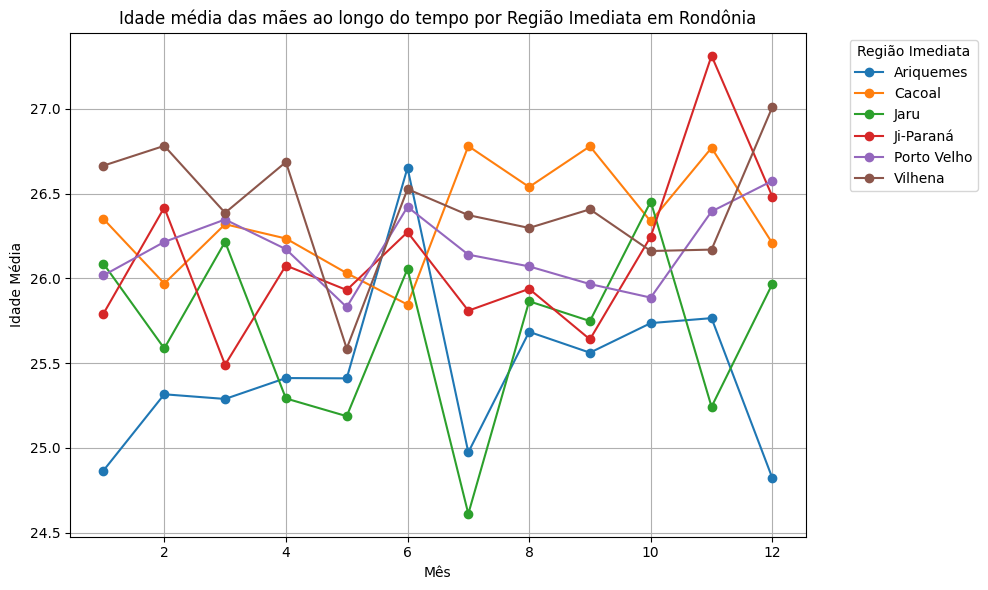

In [30]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

df['regiao_imediata'] = df['munResNome'].map(imediatas)
df['DTNASC'] = pd.to_datetime(df['DTNASC'])
df['ano'] = df['DTNASC'].dt.month
df_grouped = df.groupby(['ano', 'regiao_imediata'])['IDADEMAE'].mean().reset_index()

plt.figure(figsize=(10, 6))

for regiao in df_grouped['regiao_imediata'].unique():
    subset = df_grouped[df_grouped['regiao_imediata'] == regiao]
    plt.plot(subset['ano'], subset['IDADEMAE'], marker='o', label=regiao)

plt.title('Idade média das mães ao longo do tempo por Região Imediata em Rondônia')
plt.xlabel('Mês')
plt.ylabel('Idade Média')
plt.legend(title='Região Imediata', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


Para buscar e processar as tabelas dos links utilizaremos duas bibliotecas: requests para requisições HTTP e o módulo io da biblioteca StringIO para trtatar string como arquivos.

In [31]:
import requests as req
from io import StringIO

#Limpando linhas que não contém números
<class 'pandas.core.frame.DataFrame'>
#transforma números str em float
Categoriza os idhs municipais de acordo com as bandas


C:\Users\coimb\AppData\Local\Temp\ipykernel_8020\491570382.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].astype(float)
C:\Users\coimb\AppData\Local\Temp\ipykernel_8020\491570382.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].astype(float)
C:\Users\coimb\AppData\Local\Temp\ipykernel_8020\491570382.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

<Axes: >

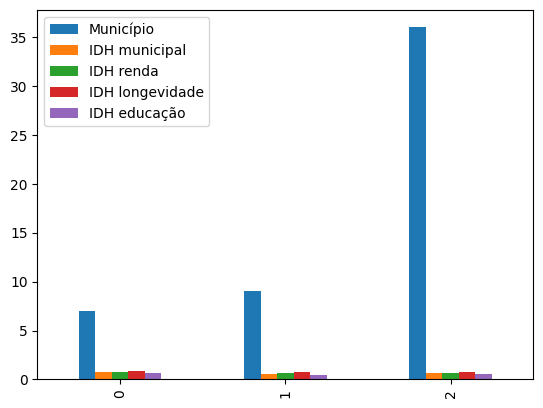

In [32]:
try:
    request_headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/111.0'
    }     
    DATA_URL = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M"      
    response = req.get(DATA_URL, headers=request_headers)         
    html_tables = pd.read_html(StringIO(response.text),index_col=0)  
except Exception as e:
    print(e)

df_idh=html_tables[0]   

df_idh.columns = ['Município', 'IDH municipal', 'IDH renda', 'IDH longevidade', 'IDH educação']

target = ['nenhum município','IDH-M alto','IDH-M médio','IDH-M baixo','IDH-M muito baixo']

idh_mapping = {
    'IDH_muito_alto' :(0.800 , 1.000),
    'IDH_alto' :      (0.700 ,0.799),
    'IDH_médio' :     (0.600 , 0.699),
    'IDH_baixo':      (0.500 , 0.599),
    'IDH_muito_baixo':(0.000 , 0.499)
}
def floatfy(data):
    columns = df_idh.columns.to_list()
    for column in columns:
        if column != 'Município':
            data[column] = data[column].astype(float)
    return data
            


def categorize_idh(idh_value):
    if pd.isna(idh_value):
        return None
    for category, (low,high) in idh_mapping.items():
        if low <= idh_value < high:
            return category

#Limpando linhas que não contém números      
df_idh = df_idh[~df_idh['Município'].isin(target)]
print('#Limpando linhas que não contém números')

#transforma números str em float
df_idh=floatfy(df_idh)
print(type(df_idh))
print('#transforma números str em float')

#Categoriza os idhs municipais de acordo com as bandas do 
df_idh['IDH_Category'] = df_idh['IDH municipal'].apply(categorize_idh)
print('Categoriza os idhs municipais de acordo com as bandas')

agrupado1 = df_idh.groupby('IDH_Category').agg({
    'Município': 'count',
    'IDH municipal': 'mean',
    'IDH renda': 'mean',
    'IDH longevidade': 'mean',
    'IDH educação': 'mean'
}).reset_index()

agrupado1
agrupado1.plot(kind='bar')

In [33]:
df_idh.head(5)

,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação,IDH_Category
1,Porto Velho,0.736,0.764,0.819,0.638,IDH_alto
2,Vilhena,0.731,0.734,0.808,0.659,IDH_alto
3,Cacoal,0.718,0.727,0.821,0.620,IDH_alto
4,Ji-Paraná,0.714,0.728,0.810,0.617,IDH_alto
5,Pimenta Bueno,0.710,0.726,0.803,0.613,IDH_alto


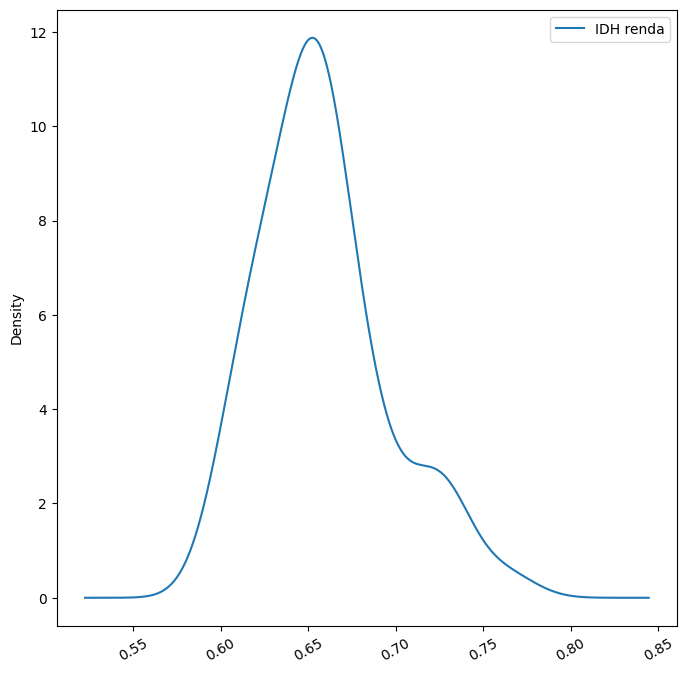

In [34]:

df_idh.plot(x='Município',y='IDH renda',kind='kde',rot=30,figsize=(8,8))
plt.show()

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [35]:
try:
    request_headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/111.0'
    }     
    DATA_URL = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM"      
    response = req.get(DATA_URL, headers=request_headers)         
    html_tables = pd.read_html(StringIO(response.text),index_col=0)  
except Exception as e:
    print(e)

df_IFDM=html_tables[0]   

df_IFDM.columns = [ 'Município', 'IFDM Consolidado (2013)']
target = ['nenhum município','Desenvolvimento moderado','Desenvolvimento regular','Desenvolvimento baixo']

idh_mapping = {
    'IFDM_Alto' :(0.800 , 1.000),
    'IFDM_Moderado' :      (0.600 ,0.799),
    'IFDM_Regular' :     (0.400 , 0.599),
    'IFDM_Baixo':      (0.000 , 0.399)    
}

#Limpando linhas que não contém números      
df_IFDM = df_IFDM[~df_IFDM['Município'].isin(target)]
print('#Limpando linhas que não contém números')

#transforma números str em float
def floatfy(data):    
    data['IFDM Consolidado (2013)'] = data['IFDM Consolidado (2013)'].str.replace(' ','').astype(float)
    return data

df_IFDM=floatfy(df_IFDM)
print(type(df_IFDM))
print('#transforma números str em float')

def categorize_idh(idh_value):
    if pd.isna(idh_value):
        return None
    for category, (low,high) in idh_mapping.items():
        if low <= idh_value < high:
            return category

#Categoriza os idhs municipais de acordo com as bandas do 
df_IFDM['IFDM_Category'] = df_IFDM['IFDM Consolidado (2013)'].apply(categorize_idh)
print('Categoriza os df_IFDM municipais de acordo com as bandas')

df_IFDM.head(5)

#Limpando linhas que não contém números
<class 'pandas.core.frame.DataFrame'>
#transforma números str em float
Categoriza os df_IFDM municipais de acordo com as bandas


C:\Users\coimb\AppData\Local\Temp\ipykernel_8020\2676495736.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IFDM Consolidado (2013)'] = data['IFDM Consolidado (2013)'].str.replace(' ','').astype(float)
C:\Users\coimb\AppData\Local\Temp\ipykernel_8020\2676495736.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IFDM['IFDM_Category'] = df_IFDM['IFDM Consolidado (2013)'].apply(categorize_idh)


,Município,IFDM Consolidado (2013),IFDM_Category
1º,Ariquemes,0.7746,IFDM_Moderado
2º,Vilhena,0.7465,IFDM_Moderado
3º,Pimenta Bueno,0.7383,IFDM_Moderado
4º,Porto Velho,0.7257,IFDM_Moderado
5º,Ji-Paraná,0.7117,IFDM_Moderado


<Axes: xlabel='IFDM_Category'>

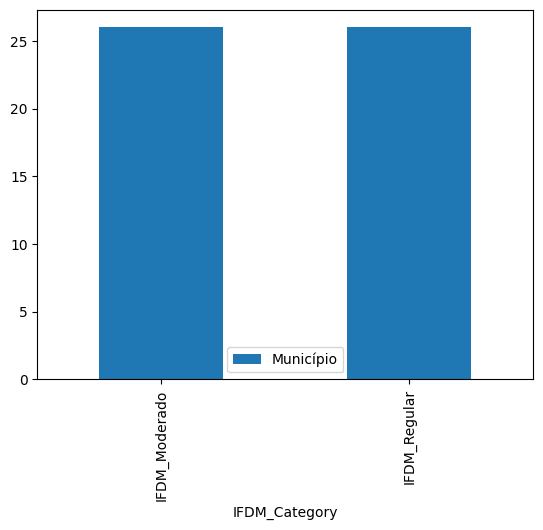

In [36]:
agrupado1 = df_IFDM.groupby('IFDM_Category').agg({
    'Município': 'count',
    'IFDM Consolidado (2013)': 'mean'    
}).reset_index()

agrupado1
agrupado1.plot(kind='bar', x='IFDM_Category', y='Município')

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [37]:
try:
    request_headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/111.0'
    }     
    DATA_URL = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"      
    response = req.get(DATA_URL, headers=request_headers)         
    html_tables = pd.read_html(StringIO(response.text),index_col=0)  
except Exception as e:
    print(e)
dfs = {}
names = ['df_1bi','df_500mi','df_300m','df_200m','df_100mi','df_menor_100mi']
for i, name in enumerate(names):
    dfs[name] = html_tables[i]
df_PIB = pd.concat(dfs.values(), axis=0, ignore_index=True)
df_PIB.index += 1
df_PIB
df_PIB.columns = ['Posição(2014)','Município','PIB','Alteração','Posição']
df_PIB

,Posição(2014),Município,PIB,Alteração,Posição
1,(0),Porto Velho,17 912 070,NaN,NaN
2,(0),Ji-Paraná,3 783 972,NaN,NaN
3,(0),Vilhena,2 831 175,NaN,NaN
4,(0),Ariquemes,2 579 830,NaN,NaN
5,(0),Cacoal,2 261 644,NaN,NaN
6,(0),Jaru,1 500 890,NaN,NaN
7,(0),Rolim de Moura,1 283 434,NaN,NaN
8,(0),Pimenta Bueno,1 164 877,NaN,NaN
9,(0),Guajará-Mirim,893 000,NaN,NaN
10,(0),Ouro Preto do Oeste,834 000,NaN,NaN


In [38]:
idh_mapping = {
    'PIB_1bi' :       (1000000.0,float('inf')),
    'PIB_500mi' :     (500000.0, 999999.0),
    'PIB_300mi' :     (400000.0, 499999.0),
    'PIB_200mi':      (200000.0, 399999.0),
    'PIB_100mi':      (100000.0, 199999.0),
    'PIB_menor_100mi':    (0.0 , 99999.0)
}

#transforma números str em float
def floatfy(data):    
    data['PIB'] = data['PIB'].str.replace(' ','').astype(float)
    return data
    
df_PIB=floatfy(df_PIB)

def categorize_idh(idh_value):
    if pd.isna(idh_value):
        return None
    for category, (low,high) in idh_mapping.items():
        if low <= idh_value < high:
            return category
    return None

#Categoriza os idhs municipais de acordo com as bandas do 
df_PIB['PIB_Category'] = df_PIB['PIB'].apply(categorize_idh)
df_PIB.drop(columns=['Alteração','Posição','Posição(2014)'],inplace=True)

<Axes: xlabel='PIB_Category'>

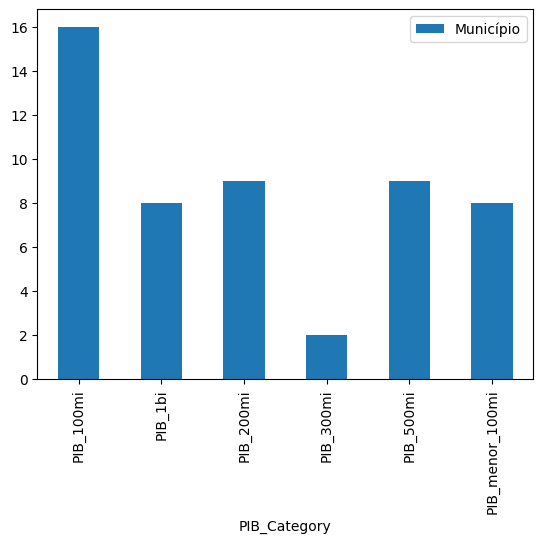

In [39]:
agrupado1 = df_PIB.groupby('PIB_Category').agg({
    'Município': 'count',
    'PIB': 'mean'    
}).reset_index()

agrupado1
agrupado1.plot(kind='bar', x='PIB_Category', y='Município')

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [40]:
df_idh

,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação,IDH_Category
1,Porto Velho,0.736,0.764,0.819,0.638,IDH_alto
2,Vilhena,0.731,0.734,0.808,0.659,IDH_alto
3,Cacoal,0.718,0.727,0.821,0.620,IDH_alto
4,Ji-Paraná,0.714,0.728,0.810,0.617,IDH_alto
5,Pimenta Bueno,0.710,0.726,0.803,0.613,IDH_alto
6,Ariquemes,0.702,0.716,0.806,0.600,IDH_alto
7,Rolim de Moura,0.700,0.709,0.808,0.598,IDH_alto
8,Cerejeiras,0.692,0.688,0.799,0.602,IDH_médio
9,Jaru,0.689,0.687,0.825,0.577,IDH_médio
10,Colorado do Oeste,0.685,0.676,0.814,0.584,IDH_médio


In [41]:
df_PIB
corrections = {
    "Santa Luzia do Oeste": "Santa Luzia d'Oeste",
    "Alvorada do Oeste": "Alvorada d'Oeste",
    "São Felipe do Oeste": "São Felipe d'Oeste",
    "Nova Brasilândia do Oeste": "Nova Brasilândia d'Oeste",
    "Alta Floresta do Oeste": "Alta Floresta d'Oeste",
    "Machadinho do Oeste": "Machadinho d'Oeste"
}
df_PIB['Município'] = df_PIB['Município'].replace(corrections)
df_PIB

,Município,PIB,PIB_Category
1,Porto Velho,17912070.0,PIB_1bi
2,Ji-Paraná,3783972.0,PIB_1bi
3,Vilhena,2831175.0,PIB_1bi
4,Ariquemes,2579830.0,PIB_1bi
5,Cacoal,2261644.0,PIB_1bi
6,Jaru,1500890.0,PIB_1bi
7,Rolim de Moura,1283434.0,PIB_1bi
8,Pimenta Bueno,1164877.0,PIB_1bi
9,Guajará-Mirim,893000.0,PIB_500mi
10,Ouro Preto do Oeste,834000.0,PIB_500mi


In [42]:
df_IFDM

,Município,IFDM Consolidado (2013),IFDM_Category
1º,Ariquemes,0.7746,IFDM_Moderado
2º,Vilhena,0.7465,IFDM_Moderado
3º,Pimenta Bueno,0.7383,IFDM_Moderado
4º,Porto Velho,0.7257,IFDM_Moderado
5º,Ji-Paraná,0.7117,IFDM_Moderado
6º,Cacoal,0.7111,IFDM_Moderado
7º,Santa Luzia d'Oeste,0.6850,IFDM_Moderado
8º,Rolim de Moura,0.6785,IFDM_Moderado
9º,Chupinguaia,0.6766,IFDM_Moderado
10º,São Miguel do Guaporé,0.6699,IFDM_Moderado


<Axes: xlabel='Município'>

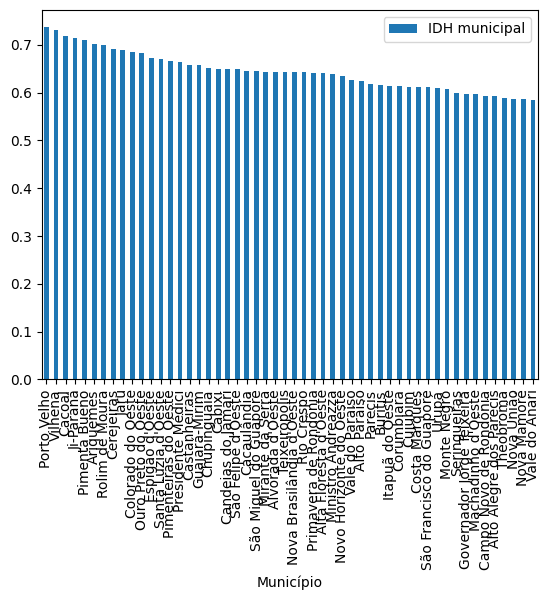

In [43]:
df_merged = df_idh.merge(df_PIB, on='Município',how='outer').merge(df_IFDM,on='Município',how='outer')
df_merged.plot(x='Município',y='IDH municipal',kind='bar')


In [46]:
df['munResNome'] = df['munResNome'].str.replace("Espigão D'Oeste", "Espigão d'Oeste", regex=False)
df['munResNome'] = df['munResNome'].str.replace("Santa Luzia D'Oeste", "Santa Luzia d'Oeste", regex=False)
df['munResNome'] = df['munResNome'].str.replace("Alvorada D'Oeste", "Alvorada d'Oeste", regex=False)
df['munResNome'] = df['munResNome'].str.replace("São Felipe D'Oeste", "São Felipe d'Oeste", regex=False)
df['munResNome'] = df['munResNome'].str.replace("Nova Brasilândia D'Oeste", "Nova Brasilândia d'Oeste", regex=False)
df['munResNome'] = df['munResNome'].str.replace("Alta Floresta D'Oeste", "Alta Floresta d'Oeste", regex=False)
df['munResNome'] = df['munResNome'].str.replace("Machadinho D'Oeste", "Machadinho d'Oeste", regex=False)

df_updated = df_merged.merge(df, left_on='Município', right_on='munResNome', how='left')

df_updated.drop(columns=['munResNome','AltRange','DTRECORIGA'], inplace=True)
df_updated['Município'].unique()

df.replace('', np.nan, inplace=True)

for col in df.select_dtypes(include=[np.number]).columns:
    median_value = df[col].median() 
    df[col].fillna(median_value, inplace=True)  

for col in df.select_dtypes(include=[object]).columns:
    mode_value = df[col].mode()[0]  
    df[col].fillna(mode_value, inplace=True)

df_updated.to_csv('rond_pib_idh_ifdm.csv', index=False)
df_updated.isna().sum().sort_values()


c:\Users\coimb\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Município     0
STCESPARTO    0
STTRABPART    0
TPAPRESENT    0
MESPRENAT     0
             ..
PARTO         0
GRAVIDEZ      0
GESTACAO      0
NATURALMAE    0
ano           0
Length: 81, dtype: int64

In [47]:
df_updated.columns


Index(['Município', 'IDH municipal', 'IDH renda', 'IDH longevidade',
       'IDH educação', 'IDH_Category', 'PIB', 'PIB_Category',
       'IFDM Consolidado (2013)', 'IFDM_Category', 'ORIGEM', 'CODESTAB',
       'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE',
       'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'GESTACAO',
       'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC', 'SEXO',
       'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010', 'SERIESCMAE',
       'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES',
       'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM', 'CONSPRENAT',
       'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO', 'TPNASCASSI',
       'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1', 'STDNEPIDEM',
       'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE', 'KOT

<Axes: >

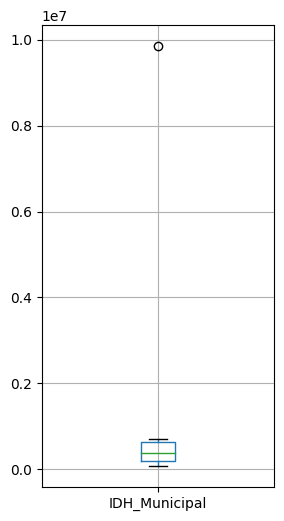

In [48]:
average_ages = df_updated.groupby('PIB_Category').agg(
    IDH_Municipal=('PIB', 'mean')
      
).reset_index()

average_ages.boxplot(figsize=(3,6))

array([[<Axes: title={'center': 'IDH_Municipal'}>]], dtype=object)

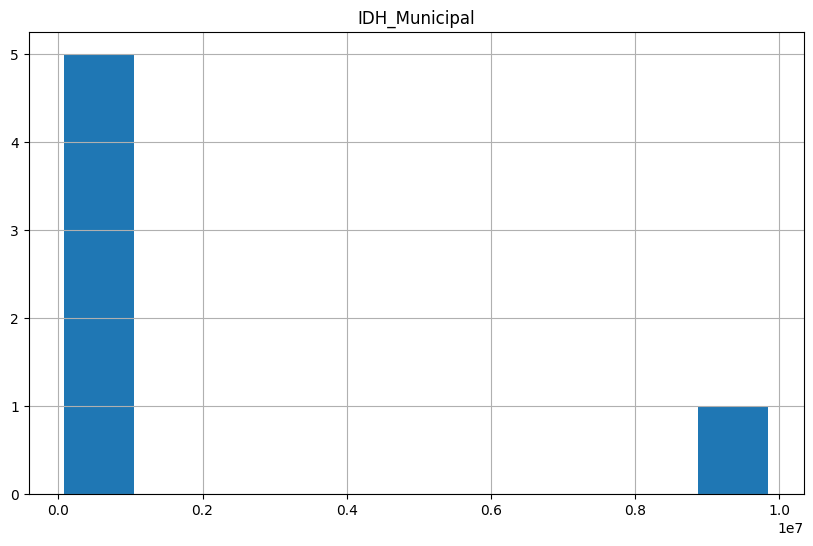

In [49]:
average_ages.hist(figsize=(10,6))

In [50]:
""" df_updated.dropna(inplace=True)
df_updated.shape """

' df_updated.dropna(inplace=True)\ndf_updated.shape '

In [51]:
columns_to_select = ['IDADEMAE','APGAR5','IDH municipal', 'PESO']

new_df = df_updated[columns_to_select]

C:\Users\coimb\AppData\Local\Temp\ipykernel_8020\300898331.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idade_mae_by_pib_category = df_updated.groupby('PIB_Category')['IDADEMAE'].mean().reset_index()
C:\Users\coimb\AppData\Local\Temp\ipykernel_8020\300898331.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idade_mae_by_pib_category = df_updated.groupby('PIB_Category')['IDADEMAE'].mean().reset_index()


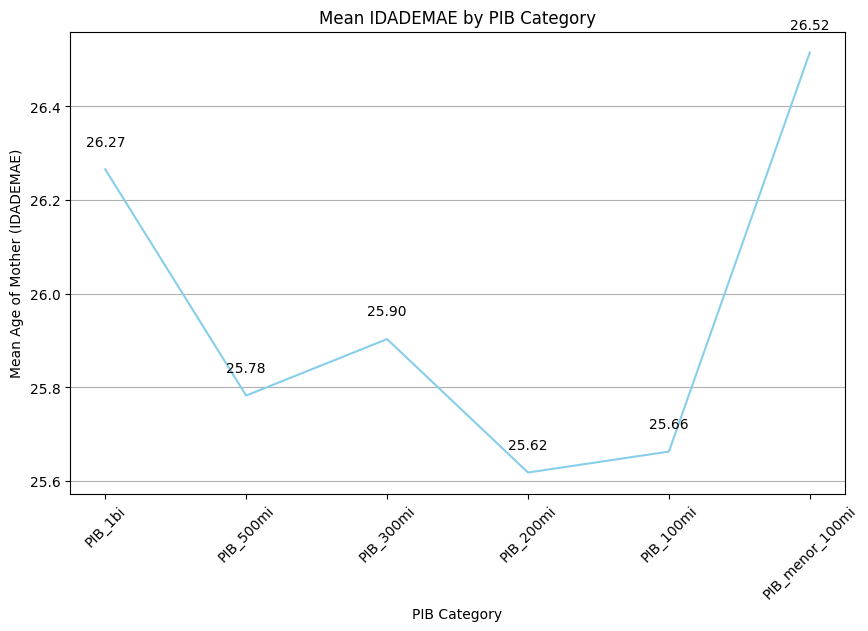

In [83]:
idade_mae_by_pib_category = df_updated.groupby('PIB_Category')['IDADEMAE'].mean().reset_index()

ordered_categories = ['PIB_1bi', 'PIB_500mi', 'PIB_300mi', 'PIB_200mi', 'PIB_100mi', 'PIB_menor_100mi']

df_updated['PIB_Category'] = pd.Categorical(df_updated['PIB_Category'], categories=ordered_categories, ordered=True)

idade_mae_by_pib_category = df_updated.groupby('PIB_Category')['IDADEMAE'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(idade_mae_by_pib_category['PIB_Category'], idade_mae_by_pib_category['IDADEMAE'], color='skyblue')

# Add labels for each point
for i, row in idade_mae_by_pib_category.iterrows():
    plt.text(row['PIB_Category'], row['IDADEMAE'] + 0.05, f'{row["IDADEMAE"]:.2f}', ha='center', fontsize=10)

plt.xlabel('PIB Category')
plt.ylabel('Mean Age of Mother (IDADEMAE)')
plt.title('Mean IDADEMAE by PIB Category')
plt.xticks(rotation=45)  
plt.grid(True, axis='y')

plt.show()

Percebe-se uma variação na média de idade das mães conforme a faixa de PIB do município no qual ocorreu o nascimento. Existe uma tendência de queda na média das idades conforme a faixa de PIB diminui, isso ocorre até a faixa de municípios com PIB acima de 200 milhões onde a média passa a aumentar e atingir seu máximo nos municípios com PIB na faixa de menos de 100 milhões.